<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2023-08-06 15:53:17--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2023-08-06 15:53:17--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2023-08-06 15:53:18 (11.0 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2023-08-06 15:53:18--
Total wall clock time: 0.4s
Downloaded: 1 files, 418K in 0.04s (11.0 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('weight_height.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = df.isna().mean()*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [5]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(subset=['Height'], inplace = True)
df_clean.dropna(subset=['Weight'], inplace = True)

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

df2 = df_clean.copy()

df2['peso'] = df2['Weight']/2.2
df2['altura'] = df2['Height']/39.37
df2['sexo'] = df2.apply(lambda x: 'masculino' if x.Gender == 'Male' else 'femenino', axis=1)
df2['sexo'].head(-5)


0       masculino
1       masculino
2       masculino
3       masculino
4       masculino
          ...    
9990     femenino
9991     femenino
9992     femenino
9993     femenino
9994     femenino
Name: sexo, Length: 9995, dtype: object

In [13]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

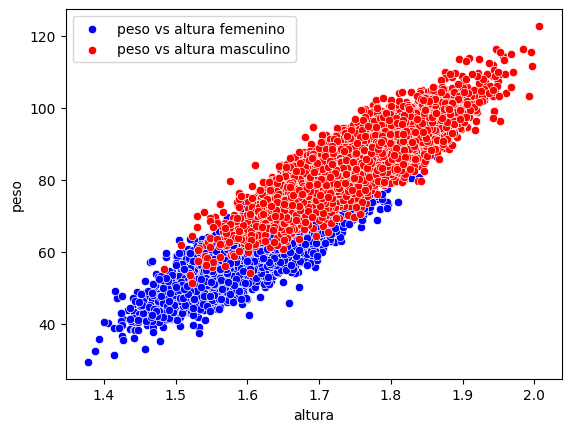

In [15]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
y_fem = df2[df2['sexo']=='femenino']['peso']
y_masc = df2[df2['sexo']=='masculino']['peso']
x_fem = df2[df2['sexo']=='femenino']['altura']
x_masc = df2[df2['sexo']=='masculino']['altura']

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=x_fem, y=y_fem, ax=ax, color='b', label='peso vs altura femenino')
sns.scatterplot(x=x_masc, y=y_masc, ax=ax, color='r', label='peso vs altura masculino')
plt.show()

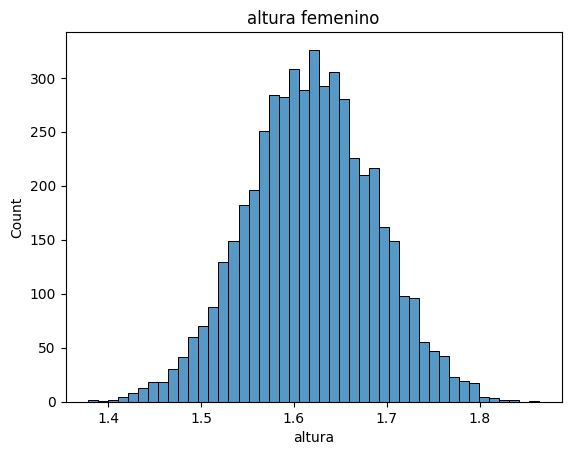

altura femenina media:  1.6182060859391687


In [22]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.histplot(x=x_fem)
plt.title('altura femenino')
plt.show()
print('altura femenina media: ', x_fem.mean())

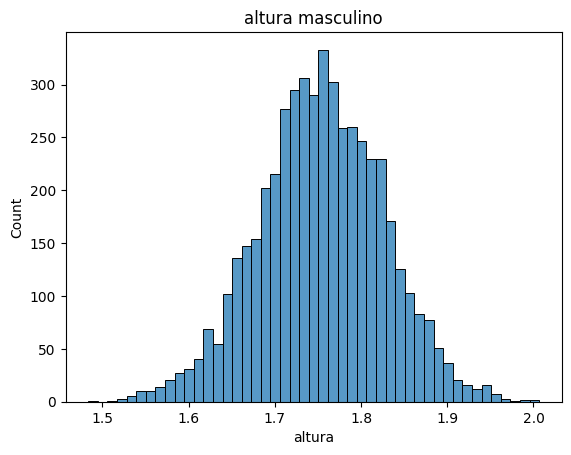

altura masculino media:  1.7532726925633078


In [23]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.histplot(x=x_masc)
plt.title('altura masculino')
plt.show()
print('altura masculino media: ', x_masc.mean())

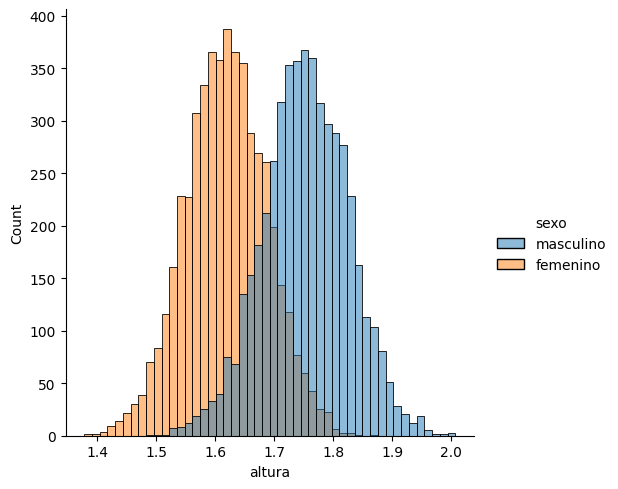

In [24]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


## Modelo femenino

In [26]:
#Obtener valiables x e y femenino
y_fem_peso = y_fem.copy().values.reshape(-1,1)
x_fem_altura = x_fem.copy().values.reshape(-1,1)

In [27]:
#Dividir dataset 70%-30%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_fem_altura, y_fem_peso, test_size=0.3, random_state=42)

In [29]:
#Entrenar modelo de regresion
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [32]:
#Calcular métrica r2_score

from sklearn.metrics import r2_score
y_hat = lr.predict(x_test)

value = r2_score(y_test, y_hat)
print('r2_score: ',value)


r2_score:  0.7301914495397976


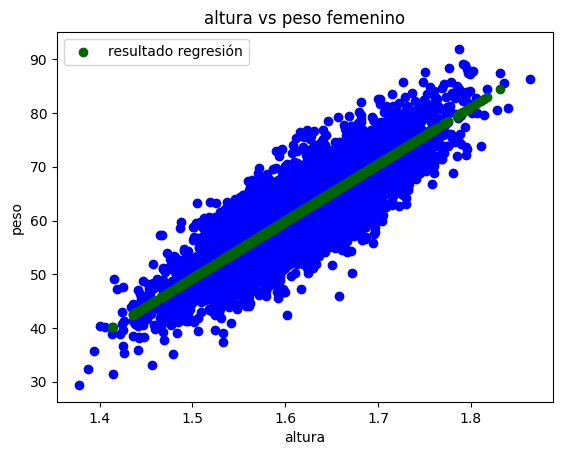

In [37]:
#Dibujar resultado de la regresión sobre los datos de entrada

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(x_fem_altura, y_fem_peso, color='b')
ax.scatter(x_test, y_hat, color='darkGreen', label="resultado regresión")
plt.title('altura vs peso femenino')
plt.ylabel('peso')
plt.xlabel('altura')
ax.legend()
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [38]:
altura_fem = np.array([[1.55]])
y_hat_prueba = lr.predict(altura_fem)
y_hat_prueba

array([[54.59511119]])